In [1]:
from cgeniepy.ecology import EcoModel

LGM_seasonal = EcoModel("../model/muffin.CBE.GIteiiva.BASESFeTDTL_rb.seasonal")
PI_seasonal = EcoModel("../model/muffin.CBE.worlg4.BASESFeTDTL.seasonal")

lgm_temp = LGM_seasonal.get_var('ocn_sur_temp').array
pi_temp = PI_seasonal.get_var('ocn_sur_temp').array

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


No gemflag is provided, assuming the model includes biogem and ecogem
No gemflag is provided, assuming the model includes biogem and ecogem


In [2]:
lgm_ll_temp = lgm_temp.sel(lat=slice(-40, 40)).mean(dim=['lat','lon'])
lgm_nhl_temp = lgm_temp.sel(lat=slice(40, 90)).mean(dim=['lat','lon'])
lgm_shl_temp = lgm_temp.sel(lat=slice(-90, -40)).mean(dim=['lat','lon'])

pi_ll_temp = pi_temp.sel(lat=slice(-40, 40)).mean(dim=['lat','lon'])
pi_nhl_temp = pi_temp.sel(lat=slice(40, 90)).mean(dim=['lat','lon'])
pi_shl_temp = pi_temp.sel(lat=slice(-90, -40)).mean(dim=['lat','lon'])

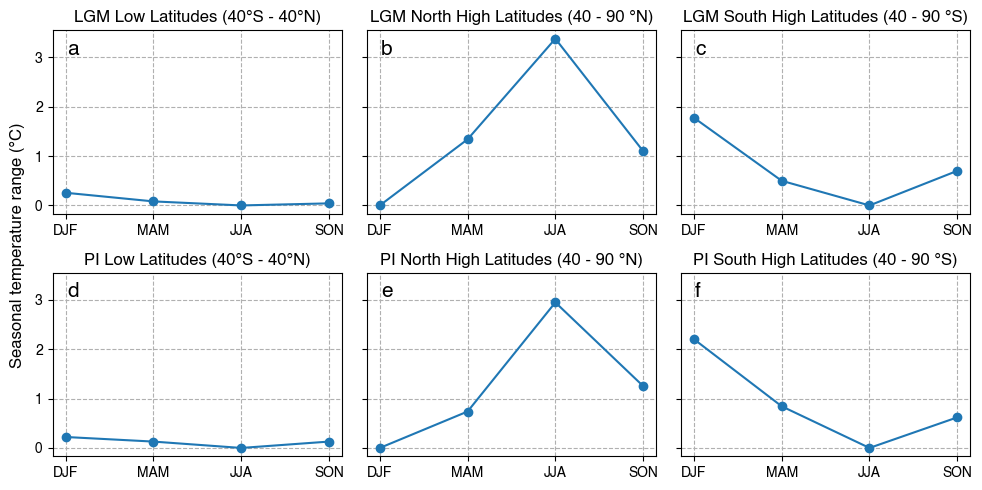

In [3]:
import matplotlib.pyplot as plt

def plot_seasonal_temp(ax, temp, title, label):
    ## plot seasonal cycle of temperature
    x_labels = ['DJF', 'MAM', 'JJA', 'SON']
    ## get time > 19 set
    final_temp = temp.where(temp.time > 19, drop=True)

    ## convert to temperature change
    final_temp = final_temp - final_temp.min(dim='time')

    ax.plot(range(len(x_labels)), final_temp.values, marker='o')
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels)
    ax.set_title(title)
    
    ## enable grid lines
    ax.grid(True, linestyle='dashed')

    # Add subplot label
    ax.text(0.05, 0.95, label, transform=ax.transAxes, fontsize=15, fontweight='bold', va='top')

# ## use Helvetica as font
plt.rcParams['font.family'] = 'Helvetica'

fig, ax = plt.subplots(2, 3, figsize=(10, 5), sharey=True)  # Set sharey=True here
## super y axis
fig.supylabel('Seasonal temperature range (°C)')

plot_seasonal_temp(ax[0,0], lgm_ll_temp, 'LGM Low Latitudes (40°S - 40°N)', 'a')
plot_seasonal_temp(ax[0,1], lgm_nhl_temp, 'LGM North High Latitudes (40 - 90 °N)', 'b')
plot_seasonal_temp(ax[0,2], lgm_shl_temp, 'LGM South High Latitudes (40 - 90 °S)', 'c')
plot_seasonal_temp(ax[1,0], pi_ll_temp, 'PI Low Latitudes (40°S - 40°N)', 'd')
plot_seasonal_temp(ax[1,1], pi_nhl_temp, 'PI North High Latitudes (40 - 90 °N)', 'e')
plot_seasonal_temp(ax[1,2], pi_shl_temp, 'PI South High Latitudes (40 - 90 °S)', 'f')


plt.tight_layout()
plt.show()

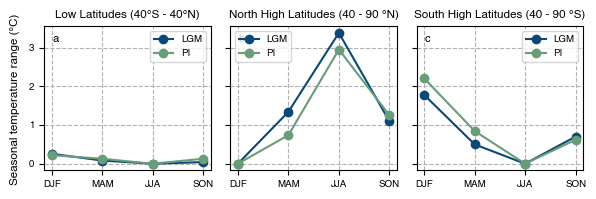

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_seasonal_temp(ax, lgm_temp, pi_temp, title, label):
    x_labels = ['DJF', 'MAM', 'JJA', 'SON']
    
    lgm_final_temp = lgm_temp.where(lgm_temp.time > 19, drop=True) - lgm_temp.min(dim='time')
    pi_final_temp = pi_temp.where(pi_temp.time > 19, drop=True) - pi_temp.min(dim='time')

    ax.plot(range(len(x_labels)), lgm_final_temp.values, marker='o', label='LGM', color='#0C4876')
    ax.plot(range(len(x_labels)), pi_final_temp.values, marker='o', label='PI', color='#699c79')
    
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels)
    ax.set_title(title)
    
    ax.grid(True, linestyle='dashed')
    
    # Add subplot label
    ax.text(0.05, 0.95, label, transform=ax.transAxes, fontsize=8, fontweight='bold', va='top')

    # Show legend
    ax.legend()

# Use Helvetica as font
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 7

fig, ax = plt.subplots(1, 3, figsize=(6, 2), sharey=True)
fig.supylabel('Seasonal temperature range (°C)')

plot_seasonal_temp(ax[0], lgm_ll_temp, pi_ll_temp, 'Low Latitudes (40°S - 40°N)', 'a')
plot_seasonal_temp(ax[1], lgm_nhl_temp, pi_nhl_temp, 'North High Latitudes (40 - 90 °N)', 'b')
plot_seasonal_temp(ax[2], lgm_shl_temp, pi_shl_temp, 'South High Latitudes (40 - 90 °S)', 'c')

plt.tight_layout()
plt.show()
fig.savefig('../output/ext_fig5.jpg', dpi=300)